In [26]:
# Advertisement application

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

def thompson_sampling_algorithm(dataset, N, d):
    ads_selected = []
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    total_reward = 0

    def sample_beta_params(alpha, beta):
        return random.betavariate(alpha, beta)

    for n in range(N):
        ad = 0
        max_random_draw = 0
        for i in range(d):
            random_draw = sample_beta_params(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

            if random_draw > max_random_draw:
                max_random_draw = random_draw
                ad = i

        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        if reward == 1:
            numbers_of_rewards_1[ad] += 1
        else:
            numbers_of_rewards_0[ad] += 1
        total_reward += reward

    plt.hist(ads_selected)
    plt.title("Histogram of Ads Selection")
    plt.xlabel("Ad")
    plt.ylabel("Number of times each ad was selected")
    plt.show()

    return ads_selected, total_reward


In [27]:
# Advertisement application_improved

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

def thompson_sampling_algorithm(dataset, N, d):
    """
    Implements the Thompson Sampling algorithm for online advertising.

    Parameters:
    dataset (pandas.DataFrame or numpy.ndarray): The dataset containing the rewards for each ad.
    N (int): The number of rounds to run the algorithm for.
    d (int): The number of ads to choose from.

    Returns:
    tuple: A tuple containing the selected ads and the total reward.

    Raises:
    TypeError: If dataset is not a pandas DataFrame or numpy ndarray.
    ValueError: If N is not a positive integer.
    ValueError: If d is not a positive integer.
    """

    # Check input types and values
    if not isinstance(dataset, (pd.DataFrame, np.ndarray)):
        raise TypeError('dataset must be a pandas DataFrame or numpy ndarray')

    if not isinstance(N, int) or N <= 0:
        raise ValueError('N must be a positive integer')

    if not isinstance(d, int) or d <= 0:
        raise ValueError('d must be a positive integer')

    ads_selected = []
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    total_reward = 0

    def sample_beta_params(alpha, beta):
        return random.betavariate(alpha, beta)

    for n in range(N):
        ad = 0
        max_random_draw = 0
        for i in range(d):
            random_draw = sample_beta_params(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

            if random_draw > max_random_draw:
                max_random_draw = random_draw
                ad = i

        ads_selected.append(ad)
        
        # Adjusted part for accessing the reward
        if isinstance(dataset, pd.DataFrame):
            reward = dataset.iloc[n, ad]  # Use .iloc for pandas DataFrame
        elif isinstance(dataset, np.ndarray):
            reward = dataset[n, ad]  # Direct indexing for numpy arrays
        
        if reward == 1:
            numbers_of_rewards_1[ad] += 1
        else:
            numbers_of_rewards_0[ad] += 1
        total_reward += reward
    
    # Set the size of the plot for better visibility
    plt.figure(figsize=(10, 6))

    # Use the `bins` parameter to specify the number of bins, and `edgecolor` to differentiate each bin
    plt.hist(ads_selected, bins=range(len(set(ads_selected)) + 1), edgecolor='black', color='skyblue')

    # Adding x-ticks labels to clarify each bin represents which ad
    plt.xticks(range(d))

    # Setting the title and labels with increased font size for better visibility
    plt.title("Histogram of Ads Selection", fontsize=16)
    plt.xlabel("Ad", fontsize=14)
    plt.ylabel("Number of times each ad was selected", fontsize=14)

    # Adding grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Finally, displaying the plot
    plt.show()

    return ads_selected, total_reward

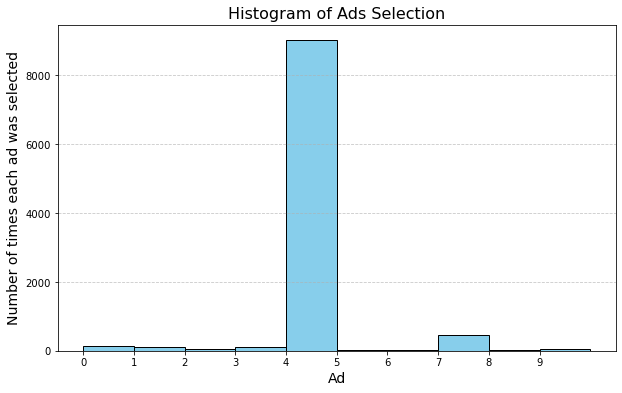

Total Reward:  2567


In [28]:
# Example Usage

# load the dataset
try:
    data = pd.read_csv('/home/young78703/Data_Science_Project/data/Ads_CTR_Optimisation.csv')
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

# set the number of rounds and number of ads
N = len(data) # the total number of rounds
d = len(data.columns) # the number of ads

# apply the UCB Algorithm function on the dataset
ads_selected, total_reward = thompson_sampling_algorithm(data, N, d)
print("Total Reward: ", total_reward)

In [12]:
# Application to general problems

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

def thompson_sampling_algorithm(dataset, N, d, options_labels=None, plot=True):
    options_selected = []
    numbers_of_successes = [0] * d
    numbers_of_failures = [0] * d
    total_reward = 0

    def sample_beta_params(alpha, beta):
        return random.betavariate(alpha, beta)

    for n in range(N):
        option = 0
        max_random_draw = 0
        for i in range(d):
            random_draw = sample_beta_params(numbers_of_successes[i] + 1, numbers_of_failures[i] + 1)

            if random_draw > max_random_draw:
                max_random_draw = random_draw
                option = i

        options_selected.append(option)
        reward = dataset.values[n, option]
        if reward == 1:
            numbers_of_successes[option] += 1
        else:
            numbers_of_failures[option] += 1
        total_reward += reward

    if plot:
        plt.hist(options_selected, bins=range(d+1), align='left', rwidth=0.8)
        plt.title("Histogram of Options Selection")
        plt.xlabel("Option")
        plt.ylabel("Number of times each option was selected")
        if options_labels:
            plt.xticks(range(d), options_labels)
        plt.show()

    return options_selected, total_reward


In [9]:
# Application to general problems_improved

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

def thompson_sampling_algorithm(dataset, N, d, options_labels=None, plot=True):
    """
    Implements the Thompson Sampling algorithm for general multi-armed bandit problems.

    Parameters:
    dataset (pandas.DataFrame or numpy.ndarray): The dataset containing the rewards for each option.
    N (int): The number of rounds to run the algorithm for.
    d (int): The number of options to choose from.
    options_labels (list or None): A list of labels for the options.
    plot (bool): Whether to plot the results or not.

    Returns:
    tuple: A tuple containing the selected options and the total reward.

    Raises:
    TypeError: If dataset is not a pandas DataFrame or numpy ndarray.
    ValueError: If N is not a positive integer.
    ValueError: If d is not a positive integer.
    """

    # Check input types and values
    if not isinstance(dataset, (pd.DataFrame, np.ndarray)):
        raise TypeError('dataset must be a pandas DataFrame or numpy ndarray')

    if not isinstance(N, int) or N <= 0:
        raise ValueError('N must be a positive integer')

    if not isinstance(d, int) or d <= 0:
        raise ValueError('d must be a positive integer')

    options_selected = []
    numbers_of_successes = [0] * d
    numbers_of_failures = [0] * d
    total_reward = 0

    def sample_beta_params(alpha, beta):
        return random.betavariate(alpha, beta)

    for n in range(N):
        option = 0
        max_random_draw = 0
        for i in range(d):
            random_draw = sample_beta_params(numbers_of_successes[i] + 1, numbers_of_failures[i] + 1)

            if random_draw > max_random_draw:
                max_random_draw = random_draw
                option = i

        options_selected.append(option)
        reward = dataset.values[n, option]
        if reward == 1:
            numbers_of_successes[option] += 1
        else:
            numbers_of_failures[option] += 1
        total_reward += reward

    if plot:
        plt.hist(options_selected, bins=range(d+1), align='left', rwidth=0.8)
        plt.title("Histogram of Options Selection")
        plt.xlabel("Option")
        plt.ylabel("Number of times each option was selected")
        if options_labels:
            plt.xticks(range(d), options_labels)
        plt.show()

    return options_selected, total_reward

In [11]:
import numpy as np
import pandas as pd

def generate_synthetic_data(num_rounds, num_ads, seed=42):
    """
    Generates a synthetic dataset.

    Parameters:
        num_rounds (int): The number of rounds.
        num_ads (int): The number of ads.
        seed (int, optional): The seed value for generating random data (default 42).

    Returns:
        data (Pandas DataFrame): A synthetic dataset containing rewards for each ad and each round.
    """

    np.random.seed(seed)

    # Generate random rewards for each ad
    true_rewards = np.random.rand(num_ads)

    # Generate a reward matrix (binary) with a probability of success equal to the true_rewards
    ad_rewards = np.random.binomial(1, true_rewards, size=(num_rounds, num_ads))

    # Create a DataFrame from the reward matrix
    data = pd.DataFrame(ad_rewards)

    return data



In [ ]:
# Usage example:
num_rounds = 10000
num_ads = 10
synthetic_data = generate_synthetic_data(num_rounds, num_ads)